In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = 10

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# partition training set into training and validation set
val_X = X_train[40000:,:]
train_X = X_train[:40000,:]
val_y = y_train[40000:,:]
train_y = y_train[:40000,:]

In [ ]:
# Define a convolutional neural network

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu", input_shape=train_X.shape[1:]))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu"))
#model.add(Activation('relu'))

model.add(BatchNormalization(momentum=0.1, epsilon=0.00001, center=False, scale=False))

model.add(AveragePooling2D(strides=(4, 4), padding = "same"))

model.add(Flatten())

model.add(Dense(10, activation = "softmax"))
#model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 16)       32        
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 16)       32        
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                      

Using real-time data augmentation.
Epoch 1/60
625/625 [==============================] - ETA: 0s - loss: 1.4119 - accuracy: 0.4909
Epoch 00001: val_accuracy improved from -inf to 0.58390, saving model to best_model.h5
625/625 [==============================] - 51s 80ms/step - loss: 1.4119 - accuracy: 0.4909 - val_loss: 1.1569 - val_accuracy: 0.5839
Epoch 2/60
625/625 [==============================] - ETA: 0s - loss: 1.0372 - accuracy: 0.6325
Epoch 00002: val_accuracy improved from 0.58390 to 0.66470, saving model to best_model.h5
625/625 [==============================] - 50s 79ms/step - loss: 1.0372 - accuracy: 0.6325 - val_loss: 0.9707 - val_accuracy: 0.6647
Epoch 3/60
625/625 [==============================] - ETA: 0s - loss: 0.8709 - accuracy: 0.6925
Epoch 00003: val_accuracy improved from 0.66470 to 0.71120, saving model to best_model.h5
625/625 [==============================] - 49s 79ms/step - loss: 0.8709 - accuracy: 0.6925 - val_loss: 0.8373 - val_accuracy: 0.7112
Epoch 4/60


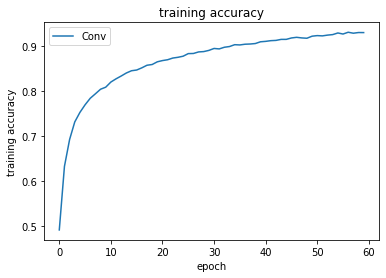

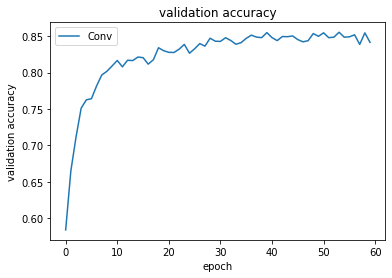

313/313 [==============================] - 4s 11ms/step - loss: 0.5061 - accuracy: 0.8521
Test accuracy: 0.8521000146865845


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
    )

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
it_train = datagen.flow(train_X, train_y, batch_size = 64)

steps = int(train_X.shape[0] / 64)

# Fit the model on the batches generated by datagen.flow().
history = model.fit(it_train, 
                    steps_per_epoch=steps, 
                    epochs=60, 
                    validation_data=(val_X, val_y), 
                    verbose=1, 
                    callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

In [ ]:
extractor = Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
activations = extractor(X_train)

In [ ]:
example = extractor.predict(np.expand_dims(X_train[0], axis = 0))
#activations = extractor.predict(X_train) # Returns a list of five Numpy arrays: one array per layer activation

The Example Image


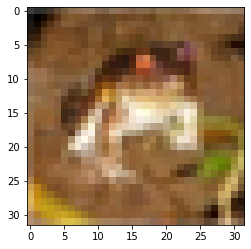

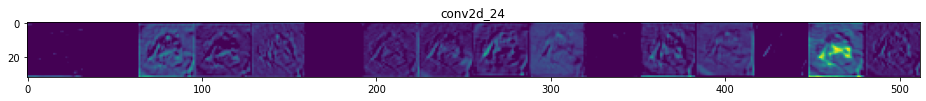

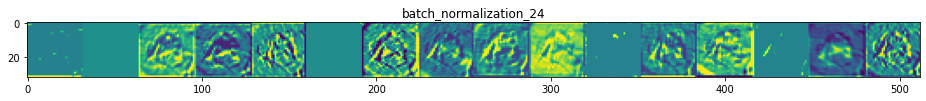

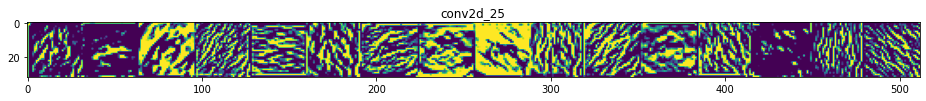

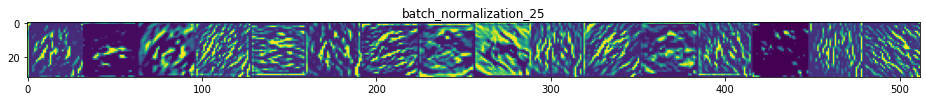

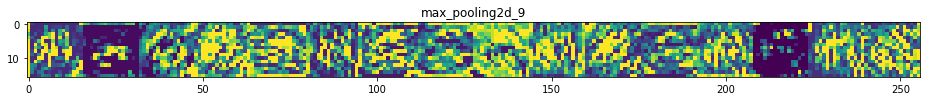

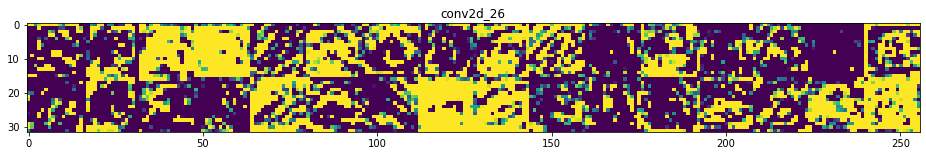

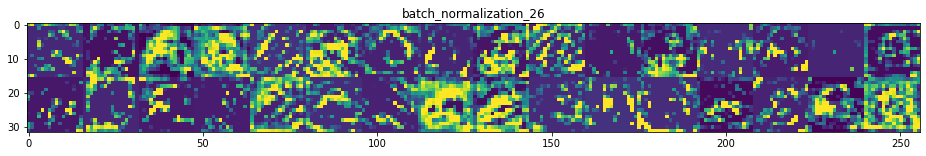

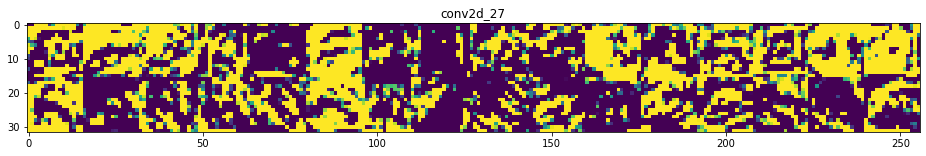

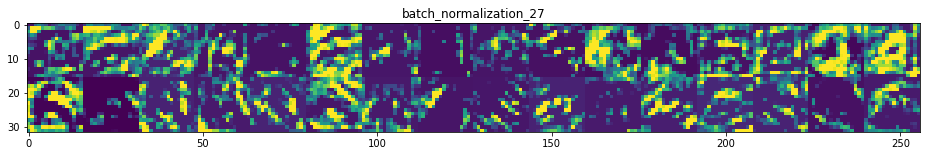

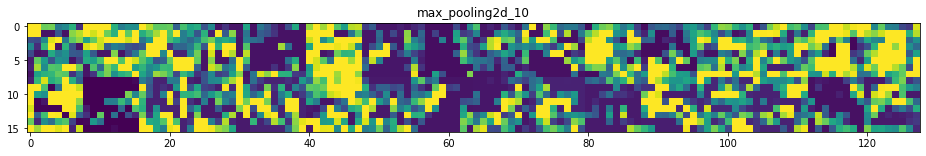

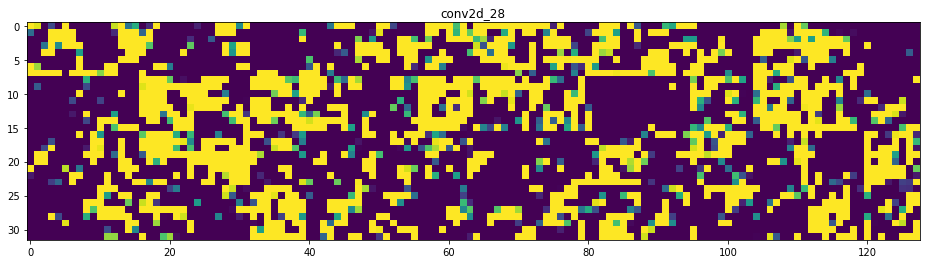

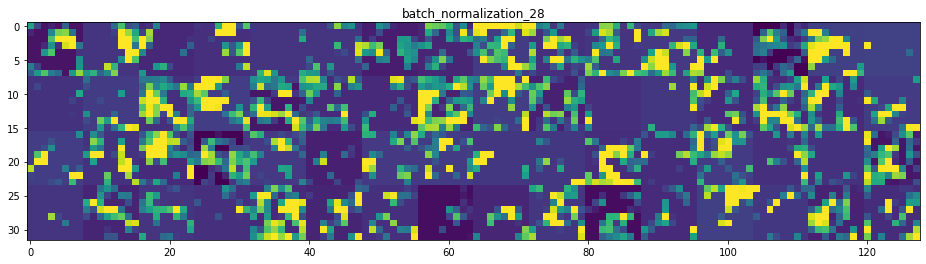

In [ ]:
print("The Example Image")
# plot raw pixel data
plt.imshow(X_train[0])
# show the figure
plt.show()

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, example))[:12]: # Displays the feature maps
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

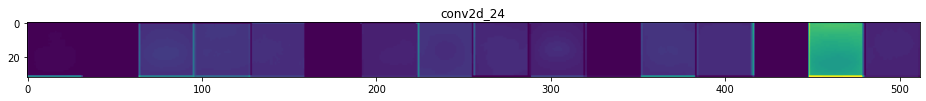

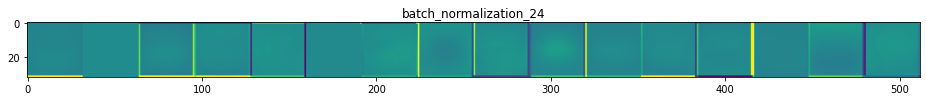

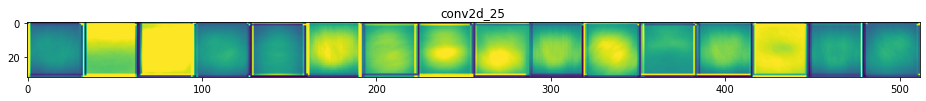

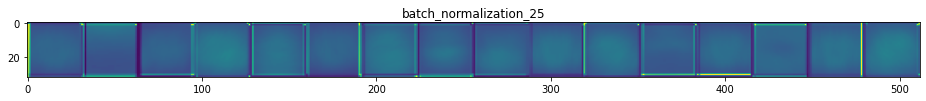

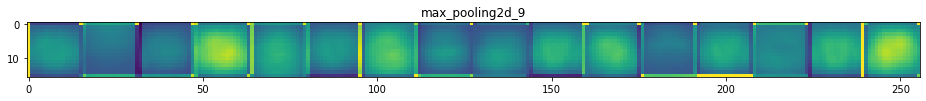

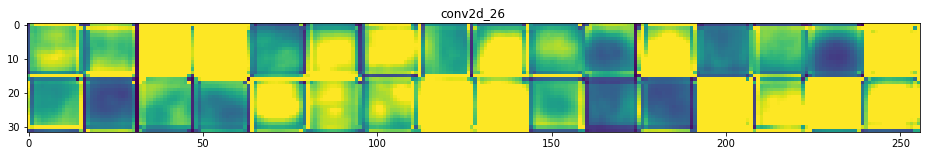

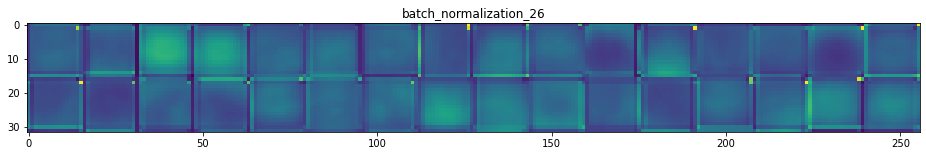

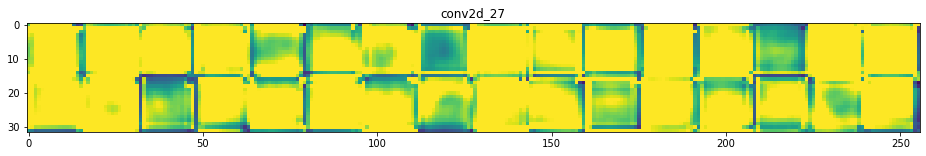

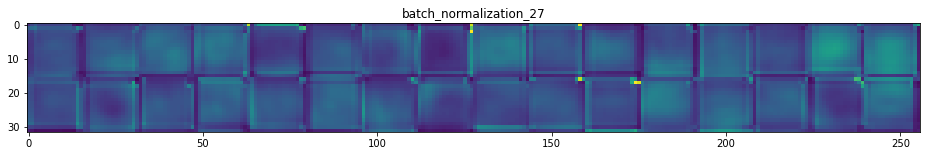

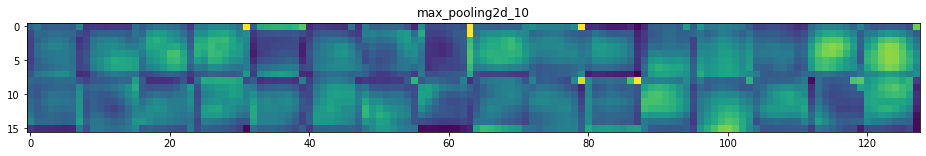

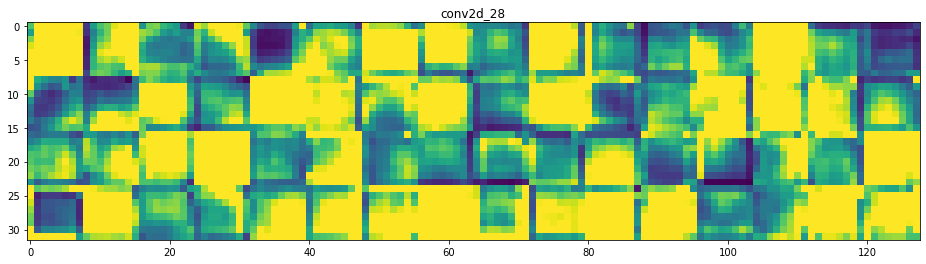

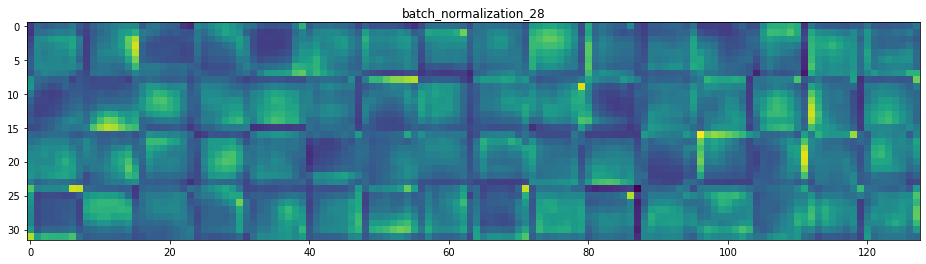

In [ ]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in list(zip(layer_names, activations))[:12]: # Displays the feature maps
  layer_activation = layer_activation.numpy()
  layer_activation = np.expand_dims(np.mean(layer_activation, axis = 0), axis = 0)
  n_features = layer_activation.shape[-1] # Number of features in the feature map
  size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
  n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols): # Tiles each filter into a big horizontal grid
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      #print(type(channel_image))
      #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
      #channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, # Displays the grid
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
abs_avgs = []
for act in activations:
  abs_avgs.append(np.mean(np.absolute(act.numpy().flatten())))
df = pd.DataFrame(list(zip(layer_names, abs_avgs)), columns = ['Layers', 'Average Absolute Values of Activations'])

In [ ]:
scaler = MinMaxScaler()
df["Normalized Average Absolute Values of Activations"] = scaler.fit_transform(df["Average Absolute Values of Activations"].values.reshape(-1, 1))
df

,Layers,Average Absolute Values of Activations,Normalized Average Absolute Values of Activations
0,conv2d_24,0.158561,0.026095
1,batch_normalization_24,0.628819,0.235642
2,conv2d_25,1.404196,0.581152
3,batch_normalization_25,0.781148,0.303521
4,max_pooling2d_9,1.136377,0.461811
5,conv2d_26,1.944430,0.821881
6,batch_normalization_26,0.822176,0.321803
7,conv2d_27,2.344158,1.000000
8,batch_normalization_27,0.807041,0.315059
9,max_pooling2d_10,1.099829,0.445525


Epoch 1/100
157/157 [==============================] - ETA: 0s - loss: 1.3814 - accuracy: 0.5023
Epoch 00001: val_accuracy improved from -inf to 0.59160, saving model to best_model.h5
157/157 [==============================] - 23s 143ms/step - loss: 1.3814 - accuracy: 0.5023 - val_loss: 1.1482 - val_accuracy: 0.5916
Epoch 2/100
157/157 [==============================] - ETA: 0s - loss: 0.9700 - accuracy: 0.6542
Epoch 00002: val_accuracy improved from 0.59160 to 0.67560, saving model to best_model.h5
157/157 [==============================] - 24s 151ms/step - loss: 0.9700 - accuracy: 0.6542 - val_loss: 0.9095 - val_accuracy: 0.6756
Epoch 3/100
157/157 [==============================] - ETA: 0s - loss: 0.7732 - accuracy: 0.7272
Epoch 00003: val_accuracy improved from 0.67560 to 0.70090, saving model to best_model.h5
157/157 [==============================] - 25s 157ms/step - loss: 0.7732 - accuracy: 0.7272 - val_loss: 0.8440 - val_accuracy: 0.7009
Epoch 4/100
157/157 [===================

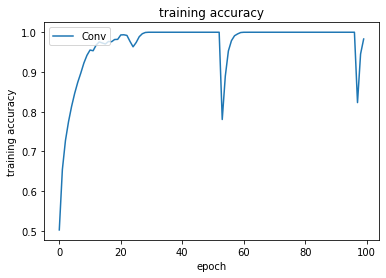

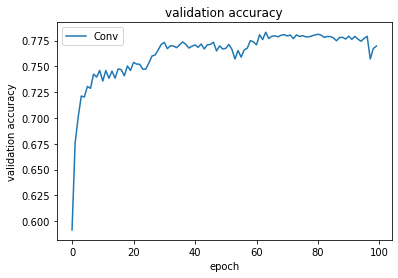

313/313 [==============================] - 3s 10ms/step - loss: 1.2633 - accuracy: 0.7752
Test accuracy: 0.7752000093460083


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
  
# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

history = model.fit(train_X, train_y,
                   batch_size=256,
                   epochs=100,
                   validation_data=(val_X, val_y),
                   shuffle=True,
                   callbacks=[save_best_model])

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', scores[1])